✅ All files loaded successfully.
✅ Merged. Detected Columns -> Revenue: None, City: city


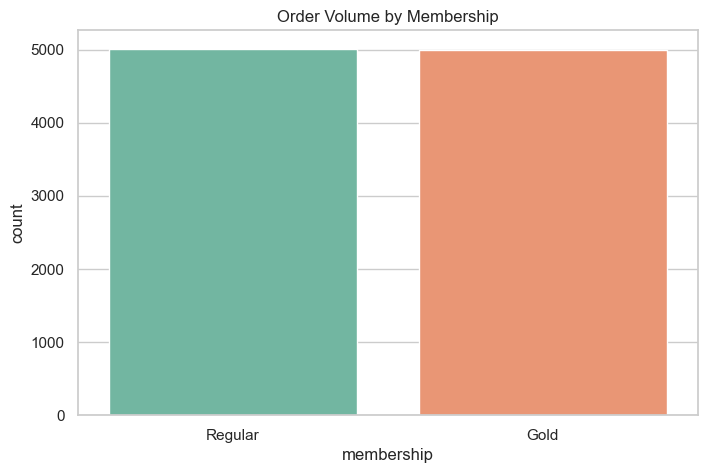

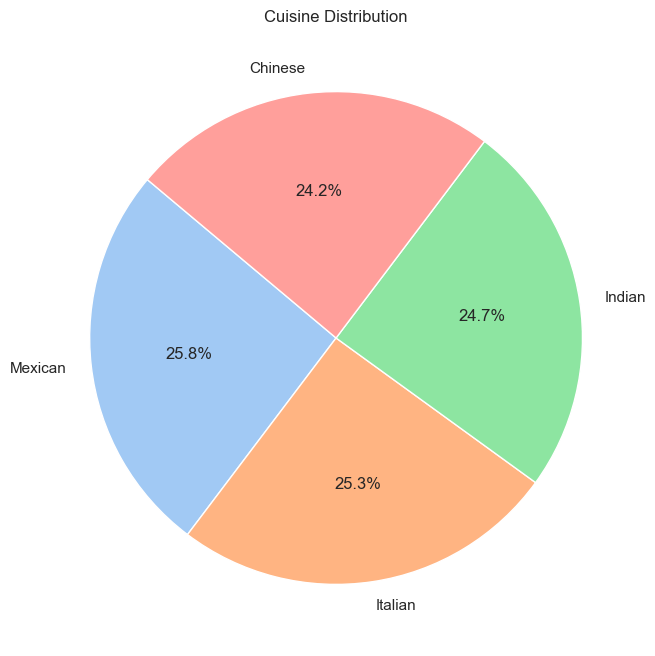

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [16]:
import pandas as pd
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load Data Files

try:
    # Load CSV
    orders_df = pd.read_csv('orders.csv')
    
    # Load JSON
    with open('users.json', 'r') as f:
        users_df = pd.DataFrame(json.load(f))
        
    # Load SQL
    conn = sqlite3.connect(':memory:')
    with open('restaurants.sql', 'r') as f:
        conn.executescript(f.read())
    table_name = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn).iloc[0, 0]
    restaurants_df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    
    print(" All files loaded successfully.")
except Exception as e:
    print(f" Loading Error: {e}")

# STEP 2: Smart Merge

# Standardize ID columns to strings to ensure they match
for df in [orders_df, users_df, restaurants_df]:
    for col in ['user_id', 'restaurant_id']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()

# Join the data
final_df = orders_df.merge(users_df, on='user_id', how='left').merge(restaurants_df, on='restaurant_id', how='left')

all_cols = final_df.columns.tolist()
amt_col = next((c for c in all_cols if c.lower() in ['order_amount', 'amount', 'total', 'price', 'order_total']), None)
city_col = next((c for c in all_cols if c.lower() in ['city', 'location', 'user_city', 'res_city']), None)
member_col = next((c for c in all_cols if 'member' in c.lower()), None)
cuisine_col = next((c for c in all_cols if 'cuisine' in c.lower()), None)


if amt_col:
    final_df[amt_col] = pd.to_numeric(final_df[amt_col], errors='coerce').fillna(0)

print(f"Merged. Detected Columns -> Revenue: {amt_col}, City: {city_col}")

# STEP 3: Create Output & Visuals

final_df.to_csv('final_food_delivery_dataset.csv', index=False)

sns.set_theme(style="whitegrid")

# 1. Revenue by City
if amt_col and city_col:
    plt.figure(figsize=(10, 5))
    data = final_df.groupby(city_col)[amt_col].sum().sort_values(ascending=False)
    sns.barplot(x=data.index, y=data.values, palette='viridis', hue=data.index, legend=False)
    plt.title(f'Total Revenue by {city_col}')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.show()

# 2. Membership Volume
if member_col:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=final_df, x=member_col, palette='Set2', hue=member_col, legend=False)
    plt.title('Order Volume by Membership')
    plt.show()

# 3. Cuisine Pie Chart
if cuisine_col:
    plt.figure(figsize=(8, 8))
    final_df[cuisine_col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Cuisine Distribution')
    plt.ylabel('')
    plt.show()

display(final_df.head())

 Step 1, 2, 3: All files (CSV, JSON, SQL) loaded successfully.
 Step 5: 'final_food_delivery_dataset.csv' created.


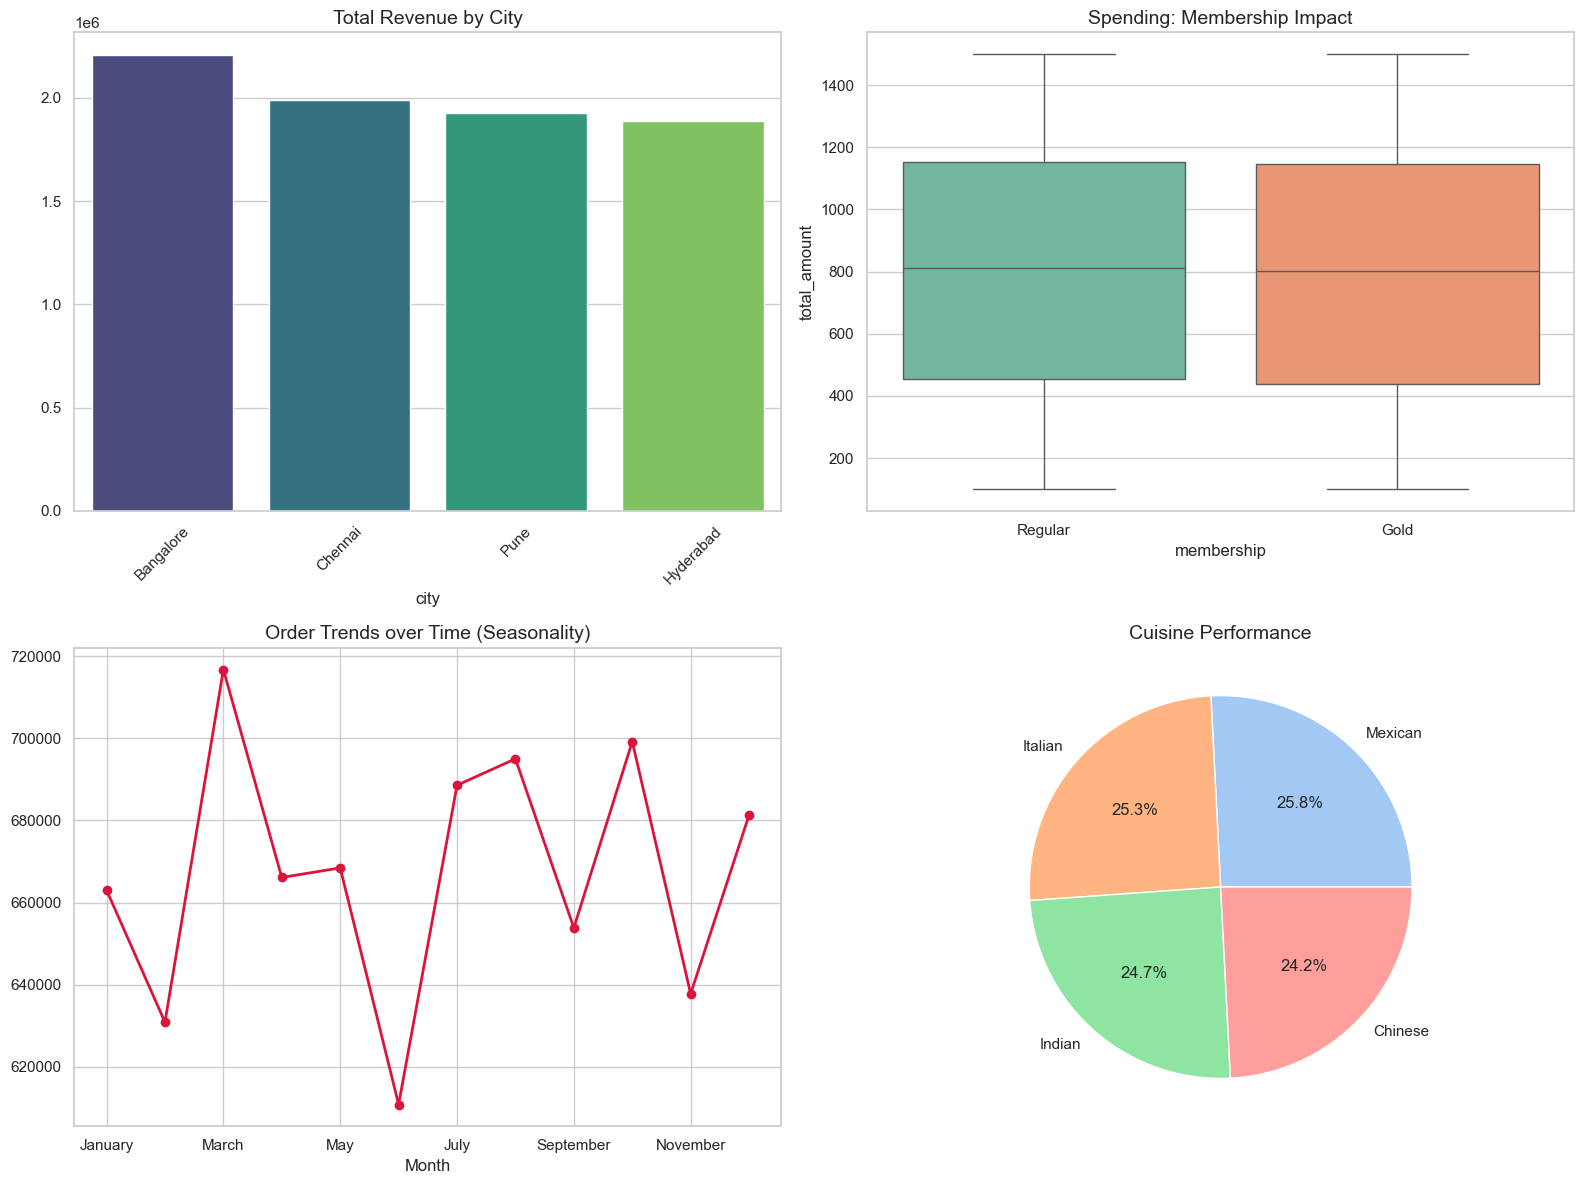


   MCQ ANSWER KEY STATS
 Total Revenue: 8,011,624.12

 Revenue by Membership Type:
membership
Gold       3975364.89
Regular    4036259.23
Name: total_amount, dtype: float64

 Top City by Revenue: Bangalore


In [17]:
import pandas as pd
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

# 1. LOAD DATA FILES

try:
    # Load CSV 
    orders_df = pd.read_csv('orders.csv')
    
    # Load JSON 
    with open('users.json', 'r') as f:
        users_df = pd.DataFrame(json.load(f))
        
    # Load SQL 
    conn = sqlite3.connect(':memory:')
    with open('restaurants.sql', 'r') as f:
        conn.executescript(f.read())
    
    table_name = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn).iloc[0, 0]
    restaurants_df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    
    print(" Step 1, 2, 3: All files (CSV, JSON, SQL) loaded successfully.")
except Exception as e:
    print(f" Loading Error: {e}")

# 2. DATA MERGING (Step 4 & 5)

# Standardize ID columns to strings and strip whitespace to ensure perfect joins
for df_temp in [orders_df, users_df, restaurants_df]:
    for col in ['user_id', 'restaurant_id']:
        if col in df_temp.columns:
            df_temp[col] = df_temp[col].astype(str).str.strip()

# Perform Left Joins to retain all orders (The Source of Truth)
final_df = orders_df.merge(users_df, on='user_id', how='left').merge(restaurants_df, on='restaurant_id', how='left')

# ==========================================
# 3. DYNAMIC COLUMN DETECTION & CLEANING
# ==========================================
cols = final_df.columns.tolist()

# Find best matches for the MCQ categories
amt_col = next((c for c in cols if any(x in c.lower() for x in ['amount', 'total', 'price'])), None)
city_col = next((c for c in cols if any(x in c.lower() for x in ['city', 'location'])), None)
mem_col = next((c for c in cols if 'member' in c.lower()), None)
date_col = next((c for c in cols if 'date' in c.lower()), None)
cuisine_col = next((c for c in cols if 'cuisine' in c.lower()), None)

# Clean Numerical Data
if amt_col:
    final_df[amt_col] = pd.to_numeric(final_df[amt_col], errors='coerce').fillna(0)

# Fix Date Warning and extract Month for Seasonality
if date_col:
    # dayfirst=True handles the DD-MM-YYYY format found in Indian/European datasets
    final_df[date_col] = pd.to_datetime(final_df[date_col], dayfirst=True, errors='coerce')
    final_df['Month'] = final_df[date_col].dt.month_name()

# Export the Final Dataset
final_df.to_csv('final_food_delivery_dataset.csv', index=False)
print(f" Step 5: 'final_food_delivery_dataset.csv' created.")

# ==========================================
# 4. DATA ANALYSIS & VISUALS (For MCQs)
# ==========================================
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A. City Performance (Revenue Distribution)
if city_col and amt_col:
    city_data = final_df.groupby(city_col)[amt_col].sum().sort_values(ascending=False)
    sns.barplot(ax=axes[0, 0], x=city_data.index, y=city_data.values, palette='viridis', hue=city_data.index, legend=False)
    axes[0, 0].set_title('Total Revenue by City', fontsize=14)
    axes[0, 0].tick_params(axis='x', rotation=45)

# B. Membership Impact (User Behavior)
if mem_col and amt_col:
    sns.boxplot(ax=axes[0, 1], data=final_df, x=mem_col, y=amt_col, palette='Set2', hue=mem_col, legend=False)
    axes[0, 1].set_title('Spending: Membership Impact', fontsize=14)

# C. Seasonality Trends
if date_col:
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    seasonal = final_df.groupby('Month')[amt_col].sum().reindex(months).dropna()
    seasonal.plot(kind='line', marker='o', ax=axes[1, 0], color='crimson', linewidth=2)
    axes[1, 0].set_title('Order Trends over Time (Seasonality)', fontsize=14)

# D. Cuisine Performance
if cuisine_col:
    final_df[cuisine_col].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axes[1, 1].set_title('Cuisine Performance', fontsize=14)
    axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

# ==========================================
# 5. MCQ LOOKUP SUMMARY
# ==========================================
print("\n" + "="*30)
print("   MCQ ANSWER KEY STATS")
print("="*30)
if amt_col:
    print(f" Total Revenue: {final_df[amt_col].sum():,.2f}")
if mem_col and amt_col:
    print("\n Revenue by Membership Type:")
    print(final_df.groupby(mem_col)[amt_col].sum())
if city_col and amt_col:
    print(f"\n Top City by Revenue: {final_df.groupby(city_col)[amt_col].sum().idxmax()}")
print("="*30)